# <font style="color:blue">Animal Classifier - Part 1: Data Understanding & Pipeline Check</font>
We will slightly modify the steps we discussed for training Neural Networks:

- Step 1 - Understand your problem
- Step 2A - Get the data
- Step 2B - Explore & Understand your data
- Step 2C - Create a sample data from the dataset
- Step 3 - Data Preparation
- Step 4 - Train a simple model on sample data and check the pipeline before proceeding to train the full network
- Step 5 - Train on Full Data
- Step 6 - Improve your model

In this notebook we will go over the steps 1 to 4 in detail and do some coding along the way! You will implement Steps 5 & 6 in the next notebook.


# <font style="color:blue">Step 1: Understand your problem </font>
As you already know, Image Classification refers to the process of classifying an image on the basis of its visual content. So, the goal for the model is to look at the image and predict which object is present in the image. Obviously, the number of objects which it can predict depends on how many objects you train it on.

In our problem, we want to classify an input image between 3 animals - Cat, Dog and Panda. 

### <font style="color:green">What do we need and how to achieve that? </font>
You need images of each animal with the correct label and train a decent size network which understands the input image.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/My\ Drive/'OpenCV Class 3 Project 1'/

/content/drive/My Drive/OpenCV Class 3 Project 1


### Next two cells are used if GPU is enabled

In [3]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
0
Tesla P100-PCIE-16GB


In [ ]:
!nvcc --version

# <font style="color:blue">Step 2A: Get the data </font>
We will be using a dataset from kaggle. [**Check it out here**](https://www.kaggle.com/ashishsaxena2209/animal-image-datasetdog-cat-and-panda).

It consists of 1000 images of each animal with all images of a particular animal in a separate folder. We have split it into 80:20 ratio for train:validation which you can download from [**here**](https://www.dropbox.com/sh/n5nya3g3airlub6/AACi7vaUjdTA0t2j_iKWgp4Ra?dl=1).

In [ ]:
!wget "https://www.dropbox.com/sh/n5nya3g3airlub6/AACi7vaUjdTA0t2j_iKWgp4Ra?dl=1" -O data.zip

--2021-08-18 19:46:54--  https://www.dropbox.com/sh/n5nya3g3airlub6/AACi7vaUjdTA0t2j_iKWgp4Ra?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/n5nya3g3airlub6/AACi7vaUjdTA0t2j_iKWgp4Ra [following]
--2021-08-18 19:46:55--  https://www.dropbox.com/sh/dl/n5nya3g3airlub6/AACi7vaUjdTA0t2j_iKWgp4Ra
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0c8fd325cc481ed9bfaa5bf440.dl.dropboxusercontent.com/zip_download_get/A34WKtiHgmixtiRxiFmXfqzzQLh4VzL4Ntfg2CLtAS5pPHRrKJtPs9OUKUwfJ6x9DXXJYyPWhHiVo3syo-yuBolyqikKyWwvrE4GVlOjTHQDXw?dl=1# [following]
--2021-08-18 19:46:57--  https://uc0c8fd325cc481ed9bfaa5bf440.dl.dropboxusercontent.com/zip_download_get/A34WKtiHgmixtiRxiFmXfqzzQLh4VzL4Ntfg2CLtAS5pPHRrKJtPs9OUKUwfJ6x9DXXJYyPWhHiV

### <font style="color:green">Extract the data</font>

In [ ]:
!unzip -q data.zip

[data.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of data.zip or
        data.zip.zip, and cannot find data.zip.ZIP, period.


In [10]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
%matplotlib inline

# <font style="color:blue"> Step 2B: Explore the data </font>
Let us explore the data and see some examples

### <font style="color:green">Folder Structure </font>

In [ ]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (97.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 155219 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!tree -d ./cat-dog-panda

./cat-dog-panda
├── training
│   ├── cat
│   ├── dog
│   └── panda
└── validation
    ├── cat
    ├── dog
    └── panda

8 directories


### <font style="color:green">Import the datasets module</font>
We will use the datasets module to load the data and check out the structure of data.

In [4]:
from torchvision import datasets

### <font style="color:green">Create a dataset object </font>

In [5]:
train_data = datasets.ImageFolder("./cat-dog-panda/training")
validation_data = datasets.ImageFolder("./cat-dog-panda/validation")

### <font style="color:green">List the classes</font>


In [6]:
print(train_data.classes)
print(validation_data.classes)

['cat', 'dog', 'panda']
['cat', 'dog', 'panda']


### <font style="color:green">Get the class ID to Name Mapping</font>

In [7]:
print(train_data.class_to_idx)
print(validation_data.class_to_idx)

{'cat': 0, 'dog': 1, 'panda': 2}
{'cat': 0, 'dog': 1, 'panda': 2}


### <font style="color:red">Find the number of samples in training and validation folders</font> 

In [8]:
num_train_samples = len(train_data)
num_validation_samples = len(validation_data)

print(num_train_samples)
print(num_validation_samples)

2400
600


### <font style="color:red">Display some samples</font>
Display one sample from each class. We know that the train dataset contains 


image size: (499, 332), target: 0


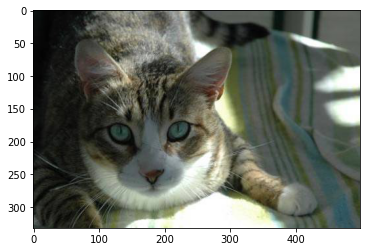

In [11]:
# Enter Code Here

img, target = train_data[5]

print('image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

image size: (500, 374), target: 1


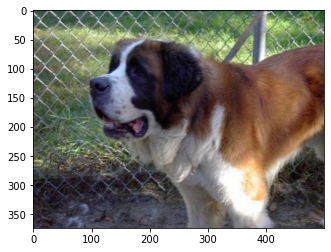

In [13]:
# Enter Code Here

img, target = train_data[901]

print('image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

image size: (500, 375), target: 2


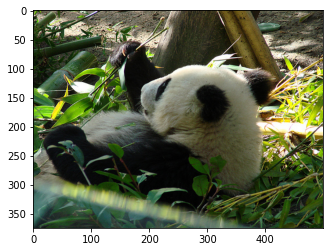

In [14]:
# Enter Code Here

img, target = train_data[2200]

print('image size: {}, target: {}'.format(img.size, target))

plt.imshow(img)
plt.show()

One thing to note from the above is that the images are of different size. 

# <font style="color:blue">Step 2C: Create sample data</font>
We will take 5% images from training and validation and create a small dataset which we will use as a sample to check our training pipeline.

In [6]:
import torch
import numpy as np

In [7]:
subset_size = .05

### <font style="color:green">Create a subset from the original data</font>
Instead of creating a copy from the original data, we can use the `Subset` method in Torch to create a subset of the data which will be used for training the model.



In [8]:
train_subset = torch.utils.data.Subset(train_data,np.arange(0,len(train_data),1./subset_size))
validation_subset = torch.utils.data.Subset(validation_data,np.arange(0,len(validation_data),1./subset_size))

In [9]:
train_subset_loader = torch.utils.data.DataLoader(train_subset,
                                         batch_size=8,
                                         num_workers=1,
                                         shuffle=False)
validation_subset_loader = torch.utils.data.DataLoader(validation_subset, 
                                         batch_size=8,
                                         num_workers=1,
                                         shuffle=False)

In [10]:
print("Train Subset Size: {}".format(len(train_subset_loader.dataset)))
print("Validation Subset Size: {}".format(len(validation_subset_loader.dataset)))

Train Subset Size: 120
Validation Subset Size: 30


We will create a separate function called `subset_data_loader` to create data loaders for subsets.

# <font style="color:blue">Step 3. Data Preparation</font>
Now that we have seen how our data is organized, we can configure the train and test loaders to feed to our training pipeline.

## <font style="color:blue">3.1. Import Libraries </font>

In [13]:
import os
import time

from typing import Iterable
from dataclasses import dataclass

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torchvision import datasets, transforms

from torch.optim import lr_scheduler

## <font style="color:blue">3.2. Image Transforms</font>
We need to normalize the data in some standard ways such as subtracting mean, making all images of same size, rescaling the range to [0,1] etc. All these operations are done using the following functions.

### <font style="color:green">3.2.1. Compulsary preprocessing transforms</font>

In [14]:
def image_preprocess_transforms():
    
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor()
        ])
    
    return preprocess

### <font style="color:green">3.2.2. Common Image Transforms</font>
Normalize for mean and std. 



In [15]:
def image_common_transforms(mean=(0.4611, 0.4359, 0.3905), std=(0.2193, 0.2150, 0.2109)):
    preprocess = image_preprocess_transforms()
    
    common_transforms = transforms.Compose([
        preprocess,
        transforms.Normalize(mean, std)
    ])
    
    return common_transforms
    

### <font style="color:green">3.2.3. Mean and STD</font>
Function for getting mean and variance

In [16]:
def get_mean_std(data_root, num_workers=4):
    
    transform = image_preprocess_transforms()
    
    loader = data_loader(data_root, transform)

    mean = 0.
    std = 0.
    
    for images, _ in loader:
        batch_samples = images.size(0) # batch size (the last batch can have smaller size!)
        images = images.view(batch_samples, images.size(1), -1)
        mean += images.mean(2).sum(0)
        std += images.std(2).sum(0)

    mean /= len(loader.dataset)
    std /= len(loader.dataset)
    
    print('mean: {}, std: {}'.format(mean, std))
    
    return mean, std

### <font style="color:green">3.2.4. Data Augmentation</font>

Adding function for data augmentation

In [17]:
def data_augmentation_preprocess(mean, std):
    
    initail_transoform = transforms.RandomChoice([
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(90)
        ])
    
    common_transforms = image_common_transforms(mean, std)
                
    aug_transforms = transforms.Compose([
        initail_transoform,
        transforms.RandomGrayscale(p=0.1),
        common_transforms
        ])
    
    return aug_transforms

## <font style="color:blue">3.3. Data Loaders </font>

### <font style="color:green">3.3.1. Data Loader for Full Data</font>
Data loader for generating batches of data to be used by the training routine

In [18]:
def data_loader(data_root, transform, batch_size=16, shuffle=False, num_workers=2):
    dataset = datasets.ImageFolder(root=data_root, transform=transform)
    
    loader = torch.utils.data.DataLoader(dataset, 
                                         batch_size=batch_size,
                                         num_workers=num_workers,
                                         shuffle=shuffle)
    
    return loader

### <font style="color:green">3.3.2. Data Loader for Subset</font>
Data loader which uses the `subset` to generate batches

In [19]:
def subset_data_loader(data_root, transform, batch_size=8, shuffle=False, num_workers=2, subset_size=0.05):
    dataset = datasets.ImageFolder(root=data_root, transform=transform)
    
    data_subset = torch.utils.data.Subset(dataset,np.arange(0,len(dataset),1./subset_size).astype(int))

    loader = torch.utils.data.DataLoader(data_subset, 
                                         batch_size=batch_size,
                                         num_workers=num_workers,
                                         shuffle=shuffle)
    
    return loader

## <font style="color:red">3.4. Prepare Data</font>
The main function which uses all the above functions to generate the train and test dataloaders.


In [20]:
def get_data(batch_size, data_root, num_workers, data_augmentation=False):
    
    train_data_path = os.path.join(data_root, 'training')
       
    mean, std = get_mean_std(data_root=train_data_path, num_workers=num_workers)
    
    common_transforms = image_common_transforms(mean, std)
        
   
    # if data_augmentation is true 
    # data augmentation implementation
    if data_augmentation:    
        train_transforms = data_augmentation_preprocess(mean, std)
    # else do common transforms
    else:
        train_transforms = common_transforms
        
        
    # train dataloader
    
    train_loader = subset_data_loader(train_data_path, 
                               train_transforms, 
                               batch_size=batch_size, 
                               shuffle=True, 
                               num_workers=num_workers)
    
    # test dataloader
    
    test_data_path = os.path.join(data_root, 'validation')
    
    test_loader = subset_data_loader(test_data_path, 
                              common_transforms, 
                              batch_size=batch_size, 
                              shuffle=False, 
                              num_workers=num_workers)
    
    return train_loader, test_loader

# <font style="color:blue">Step 4: Train a simple Model</font>
It is time to create the training pipeline and train a simple model on the sample data. We are providing most of the code in this section as you have to make the changes in the next notebook. 

## <font style="color:red">4.1. Configurations</font>

Define configurations in the section — a configuration like training configuration, system configuration. In the section, you can define batch size, data path, learning rate, etc. 


### <font style="color:green">4.1.1. System Configuration</font>

In [21]:
@dataclass
class SystemConfiguration:
    '''
    Describes the common system setting needed for reproducible training
    '''
    seed: int = 21  # seed number to set the state of all random number generators
    cudnn_benchmark_enabled: bool = True  # enable CuDNN benchmark for the sake of performance
    cudnn_deterministic: bool = True  # make cudnn deterministic (reproducible training)

### <font style="color:green">4.1.2. Training Configuration</font>

In [22]:
@dataclass
class TrainingConfiguration:
    '''
    Describes configuration of the training process
    '''
    batch_size: int = 4 
    epochs_count: int = 100  
    init_learning_rate: float = 0.0001  # initial learning rate for lr scheduler
    log_interval: int = 5  
    test_interval: int = 1  
    data_root: str = "./cat-dog-panda" 
    num_workers: int = 2  
    device: str = 'cuda'  
    


### <font style="color:green">4.1.3. System Setup</font>

In [23]:
def setup_system(system_config: SystemConfiguration) -> None:
    torch.manual_seed(system_config.seed)
    if torch.cuda.is_available():
        torch.backends.cudnn_benchmark_enabled = system_config.cudnn_benchmark_enabled
        torch.backends.cudnn.deterministic = system_config.cudnn_deterministic

## <font style="color:blue">4.2. Training Function</font>


In [24]:
def train(
    train_config: TrainingConfiguration, model: nn.Module, optimizer: torch.optim.Optimizer,
    train_loader: torch.utils.data.DataLoader, epoch_idx: int
) -> None:
    
    # change model in training mood
    model.train()
    
    # to get batch loss
    batch_loss = np.array([])
    
    # to get batch accuracy
    batch_acc = np.array([])
        
    for batch_idx, (data, target) in enumerate(train_loader):
        
        # clone target
        indx_target = target.clone()
        # send data to device (its is medatory if GPU has to be used)
        data = data.to(train_config.device)
        # send target to device
        target = target.to(train_config.device)

        # reset parameters gradient to zero
        optimizer.zero_grad()
        
        # forward pass to the model
        output = model(data)
        
        # cross entropy loss
        loss = F.cross_entropy(output, target)
        
        # find gradients w.r.t training parameters
        loss.backward()
        # Update parameters using gardients
        optimizer.step()
        
        batch_loss = np.append(batch_loss, [loss.item()])
        
        # Score to probability using softmax
        prob = F.softmax(output, dim=1)
            
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1]  
                        
        # correct prediction
        correct = pred.cpu().eq(indx_target).sum()
            
        # accuracy
        acc = float(correct) / float(len(data))
        
        batch_acc = np.append(batch_acc, [acc])
            
    epoch_loss = batch_loss.mean()
    epoch_acc = batch_acc.mean()
    print('Epoch: {} \nTrain Loss: {:.6f} Acc: {:.4f}'.format(epoch_idx, epoch_loss, epoch_acc))
    return epoch_loss, epoch_acc

## <font style="color:blue">4.3. Validation Function</font>

In [25]:
def validate(
    train_config: TrainingConfiguration,
    model: nn.Module,
    test_loader: torch.utils.data.DataLoader,
) -> float:
    # 
    model.eval()
    test_loss = 0
    count_corect_predictions = 0
    for data, target in test_loader:
        indx_target = target.clone()
        data = data.to(train_config.device)
        
        target = target.to(train_config.device)
        
        output = model(data)
        # add loss for each mini batch
        test_loss += F.cross_entropy(output, target).item()
        
        # Score to probability using softmax
        prob = F.softmax(output, dim=1)
        
        # get the index of the max probability
        pred = prob.data.max(dim=1)[1] 
        
        # add correct prediction count
        count_corect_predictions += pred.cpu().eq(indx_target).sum()

    # average over number of mini-batches
    test_loss = test_loss / len(test_loader)  
    
    # average over number of dataset
    accuracy = 100. * count_corect_predictions / len(test_loader.dataset)
    
    print(
        '\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, count_corect_predictions, len(test_loader.dataset), accuracy
        )
    )
    
    return test_loss, accuracy/100.0

## <font style="color:blue">4.4. Save the Model</font>

In [26]:
def save_model(model, device, model_dir='models', model_file_name='cat_dog_panda_classifier_part_1.pt'): # Changed filename to add 'part_1' for this section to avoid being overwritten
    

    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    model_path = os.path.join(model_dir, model_file_name)

    # make sure you transfer the model to cpu.
    if device == 'cuda':
        model.to('cpu')

    # save the state_dict
    torch.save(model.state_dict(), model_path)
    
    if device == 'cuda':
        model.to('cuda')
    
    return

## <font style="color:blue">4.5. Load the Model</font>

In [27]:
def load_model(model, model_dir='models', model_file_name='cat_dog_panda_classifier_part_1.pt'): # Changed filename to add 'part_1' for this section to avoid being overwritten
    model_path = os.path.join(model_dir, model_file_name)

    # loading the model and getting model parameters by using load_state_dict
    model.load_state_dict(torch.load(model_path))
    
    return model

## <font style="color:blue">4.6. Main Function for Training</font>

One thing to note here is that before calling the train function, we are calculating the validation loss and we know that it should be close to `log(num_classes)` and the accuracy should be close to `1/num_classes`. 

In [28]:
def main(model, optimizer, scheduler=None, system_configuration=SystemConfiguration(), 
         training_configuration=TrainingConfiguration(), data_augmentation=True):
    
    # system configuration
    setup_system(system_configuration)

    # batch size
    batch_size_to_set = training_configuration.batch_size
    # num_workers
    num_workers_to_set = training_configuration.num_workers
    # epochs
    epoch_num_to_set = training_configuration.epochs_count

    # if GPU is available use training config, 
    # else lowers batch_size, num_workers and epochs count
    if torch.cuda.is_available():
        device = "cuda"
    else:
        device = "cpu"
        batch_size_to_set = 16
        num_workers_to_set = 4

    # data loader
    train_loader, test_loader = get_data(
        batch_size=batch_size_to_set,
        data_root=training_configuration.data_root,
        num_workers=num_workers_to_set,
        data_augmentation=data_augmentation
    )
    
    # Update training configuration
    training_configuration = TrainingConfiguration(
        device=device,
        batch_size=batch_size_to_set,
        num_workers=num_workers_to_set
    )
        
    # send model to device (GPU/CPU)
    model.to(training_configuration.device)

    best_loss = torch.tensor(np.inf)
    
    # epoch train/test loss
    epoch_train_loss = np.array([])
    epoch_test_loss = np.array([])
    
    # epch train/test accuracy
    epoch_train_acc = np.array([])
    epoch_test_acc = np.array([])
    
    # Calculate Initial Test Loss
    init_val_loss, init_val_accuracy = validate(training_configuration, model, test_loader)
    print("Initial Test Loss : {:.6f}, \nInitial Test Accuracy : {:.3f}%\n".format(init_val_loss, 
                                                                                   init_val_accuracy*100))
    
    # trainig time measurement
    t_begin = time.time()
    for epoch in range(training_configuration.epochs_count):
        
        # Train
        train_loss, train_acc = train(training_configuration, model, optimizer, train_loader, epoch)
        
        epoch_train_loss = np.append(epoch_train_loss, [train_loss])
        
        epoch_train_acc = np.append(epoch_train_acc, [train_acc])

        elapsed_time = time.time() - t_begin
        speed_epoch = elapsed_time / (epoch + 1)
        speed_batch = speed_epoch / len(train_loader)
        eta = speed_epoch * training_configuration.epochs_count - elapsed_time
        
        print(
            "Elapsed {:.2f}s, {:.2f} s/epoch, {:.2f} s/batch, ets {:.2f}s".format(
                elapsed_time, speed_epoch, speed_batch, eta
            )
        )

        # Validate
        if epoch % training_configuration.test_interval == 0:
            current_loss, current_accuracy = validate(training_configuration, model, test_loader)
            
            epoch_test_loss = np.append(epoch_test_loss, [current_loss])
        
            epoch_test_acc = np.append(epoch_test_acc, [current_accuracy])
            
            if current_loss < best_loss:
                best_loss = current_loss
                print('Model Improved. Saving the Model...\n')
                save_model(model, device=training_configuration.device)
        
                
    print("Total time: {:.2f}, Best Loss: {:.3f}".format(time.time() - t_begin, best_loss))
    
    return model, epoch_train_loss, epoch_train_acc, epoch_test_loss, epoch_test_acc

## <font style="color:blue">4.7. Plot Loss and Accuracy</font>

In [29]:
def plot_loss_accuracy(train_loss, val_loss, train_acc, val_acc, colors, 
                       loss_legend_loc='upper center', acc_legend_loc='upper left', 
                       fig_size=(20, 10), sub_plot1=(1, 2, 1), sub_plot2=(1, 2, 2)):
    
    plt.rcParams["figure.figsize"] = fig_size
    fig = plt.figure()
    
    plt.subplot(sub_plot1[0], sub_plot1[1], sub_plot1[2])
    
    for i in range(len(train_loss)):
        x_train = range(len(train_loss[i]))
        x_val = range(len(val_loss[i]))
        
        min_train_loss = train_loss[i].min()
        
        min_val_loss = val_loss[i].min()
        
        plt.plot(x_train, train_loss[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN LOSS ({0:.4})".format(min_train_loss))
        plt.plot(x_val, val_loss[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID LOSS ({0:.4})".format(min_val_loss))
        
    plt.xlabel('epoch no.')
    plt.ylabel('loss')
    plt.legend(loc=loss_legend_loc)
    plt.title('Training and Validation Loss')
        
    plt.subplot(sub_plot2[0], sub_plot2[1], sub_plot2[2])
    
    for i in range(len(train_acc)):
        x_train = range(len(train_acc[i]))
        x_val = range(len(val_acc[i]))
        
        max_train_acc = train_acc[i].max() 
        
        max_val_acc = val_acc[i].max() 
        
        plt.plot(x_train, train_acc[i], linestyle='-', color='tab:{}'.format(colors[i]), 
                 label="TRAIN ACC ({0:.4})".format(max_train_acc))
        plt.plot(x_val, val_acc[i], linestyle='--' , color='tab:{}'.format(colors[i]), 
                 label="VALID ACC ({0:.4})".format(max_val_acc))
        
    plt.xlabel('epoch no.')
    plt.ylabel('accuracy')
    plt.legend(loc=acc_legend_loc)
    plt.title('Training and Validation Accuracy')
    
    fig.savefig('sample_loss_acc_plot_part_1.png') # Changed filename to add 'part_1' for this section to avoid being overwritten
    plt.show()
    
    return   

## <font style="color:blue">4.8. Define Model</font>

In the section,  define the CNN model and train the model. 

In [30]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()

        # convolution layers
        self._body = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=7),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )

        
        # Fully connected layers
        self._head = nn.Sequential(
            nn.Linear(in_features=64*52*52, out_features=1024), 
            nn.ReLU(inplace=True),
            
            nn.Linear(in_features=1024, out_features=3)
            
        )
    
    def forward(self, x):
        
        # apply feature extractor
        x = self._body(x)
        # flatten the output of conv layers
        # dimension should be batch_size * number_of weight_in_last conv_layer
        x = x.view(x.size()[0], -1)
        # apply classification head
        x = self._head(x)
        
        
        return x


## <font style="color:blue">4.9. Training</font>

In [31]:
model = MyModel()
print(model)

# get optimizer
train_config = TrainingConfiguration()

# optimizer
optimizer = optim.Adam(
    model.parameters(),
    lr = train_config.init_learning_rate
)

MyModel(
  (_body): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (_head): Sequential(
    (0): Linear(in_features=173056, out_features=1024, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=1024, out_features=3, bias=True)
  )
)


In [39]:
# train and validate
model, train_loss, train_acc, val_loss, val_acc = main(model, optimizer, scheduler=None, data_augmentation=False)

mean: tensor([0.4610, 0.4347, 0.3897]), std: tensor([0.2400, 0.2356, 0.2306])

Test set: Average loss: 1.0967, Accuracy: 8/30 (27%)

Initial Test Loss : 1.096724, 
Initial Test Accuracy : 26.667%

Epoch: 0 
Train Loss: 1.491834 Acc: 0.3917
Elapsed 2.09s, 2.09 s/epoch, 0.07 s/batch, ets 206.82s

Test set: Average loss: 0.9179, Accuracy: 19/30 (63%)

Model Improved. Saving the Model...

Epoch: 1 
Train Loss: 0.596815 Acc: 0.8083
Elapsed 13.90s, 6.95 s/epoch, 0.23 s/batch, ets 681.26s

Test set: Average loss: 0.7829, Accuracy: 17/30 (57%)

Model Improved. Saving the Model...

Epoch: 2 
Train Loss: 0.232712 Acc: 0.9250
Elapsed 26.26s, 8.75 s/epoch, 0.29 s/batch, ets 849.02s

Test set: Average loss: 0.8461, Accuracy: 16/30 (53%)

Epoch: 3 
Train Loss: 0.078270 Acc: 1.0000
Elapsed 28.99s, 7.25 s/epoch, 0.24 s/batch, ets 695.65s

Test set: Average loss: 1.0257, Accuracy: 19/30 (63%)

Epoch: 4 
Train Loss: 0.031096 Acc: 1.0000
Elapsed 31.92s, 6.38 s/epoch, 0.21 s/batch, ets 606.42s

Test set: 

## <font style="color:blue">4.10. Loss and Accuracy Plot</font>

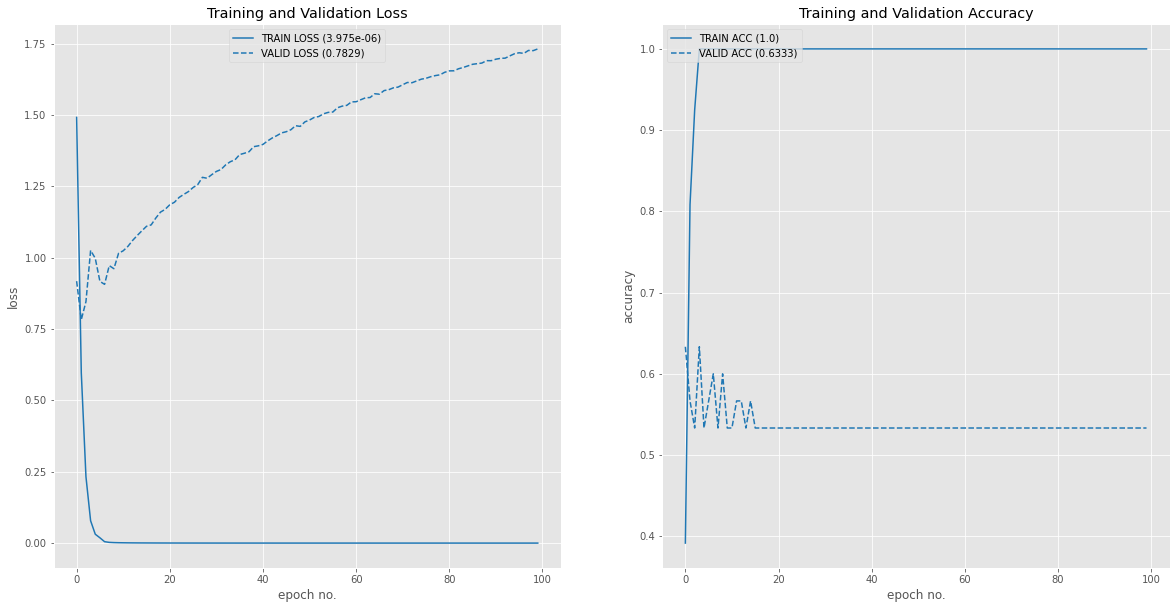

In [40]:
plot_loss_accuracy(train_loss=[train_loss], 
                   val_loss=[val_loss], 
                   train_acc=[train_acc], 
                   val_acc=[val_acc], 
                   colors=['blue'], 
                   loss_legend_loc='upper center', 
                   acc_legend_loc='upper left')

# <font style="color:blue">5. Sample Prediction</font>

Show some sample predictions.

## <font style="color:blue">5.1. Make Predictions</font>
Prediction function

In [32]:
def prediction(model, device, batch_input):
    
    # send model to cpu/cuda according to your system configuration
    model.to(device)
    
    # it is important to do model.eval() before prediction
    model.eval()

    data = batch_input.to(device)

    output = model(data)

    # Score to probability using softmax
    prob = F.softmax(output, dim=1)

    # get the max probability
    pred_prob = prob.data.max(dim=1)[0]
    
    # get the index of the max probability
    pred_index = prob.data.max(dim=1)[1]
    
    return pred_index.cpu().numpy(), pred_prob.cpu().numpy()

## <font style="color:blue">5.2. Get predictions on a batch</font>

In [117]:
def get_sample_prediction(model, data_root, mean, std):
    batch_size = 15

    if torch.cuda.is_available():
        device = "cuda"
        num_workers = 8
    else:
        device = "cpu"
        num_workers = 2
        
        
    
    # transformed data
    test_dataset_trans = datasets.ImageFolder(root=data_root, transform=image_common_transforms(mean, std))
    
    # original image dataset
    test_dataset = datasets.ImageFolder(root=data_root, transform=image_preprocess_transforms())
    
    data_len = test_dataset.__len__()
    
    interval = int(data_len/batch_size)
    
    imgs = []
    inputs = []
    targets = []
    for i in range(batch_size):
        index = i * interval
        trans_input, target = test_dataset_trans.__getitem__(index)
        img, _ = test_dataset.__getitem__(index)
        
        imgs.append(img)
        inputs.append(trans_input)
        targets.append(target)
        
    inputs = torch.stack(inputs)
        
    cls, prob = prediction(model, device, batch_input=inputs)
    
    plt.style.use('default')
    plt.rcParams["figure.figsize"] = (15, 9)
    fig = plt.figure()
    
    
    for i, target in enumerate(targets):
        plt.subplot(3, 5, i+1)
        img = transforms.functional.to_pil_image(imgs[i])
        plt.imshow(img)
        plt.gca().set_title('P:{0}({1:.2}), T:{2}'.format(test_dataset.classes[cls[i]], 
                                                     prob[i], 
                                                     test_dataset.classes[targets[i]]))
    fig.savefig('sample_prediction_part_1.png') # Changed filename to add 'part_1' for this section to avoid being overwritten
    plt.show()
    
    return cls, prob, targets
        
    

## <font style="color:blue">5.3. Load Model and Run Inference</font>

mean: tensor([0.4610, 0.4347, 0.3897]), std: tensor([0.2400, 0.2356, 0.2306])


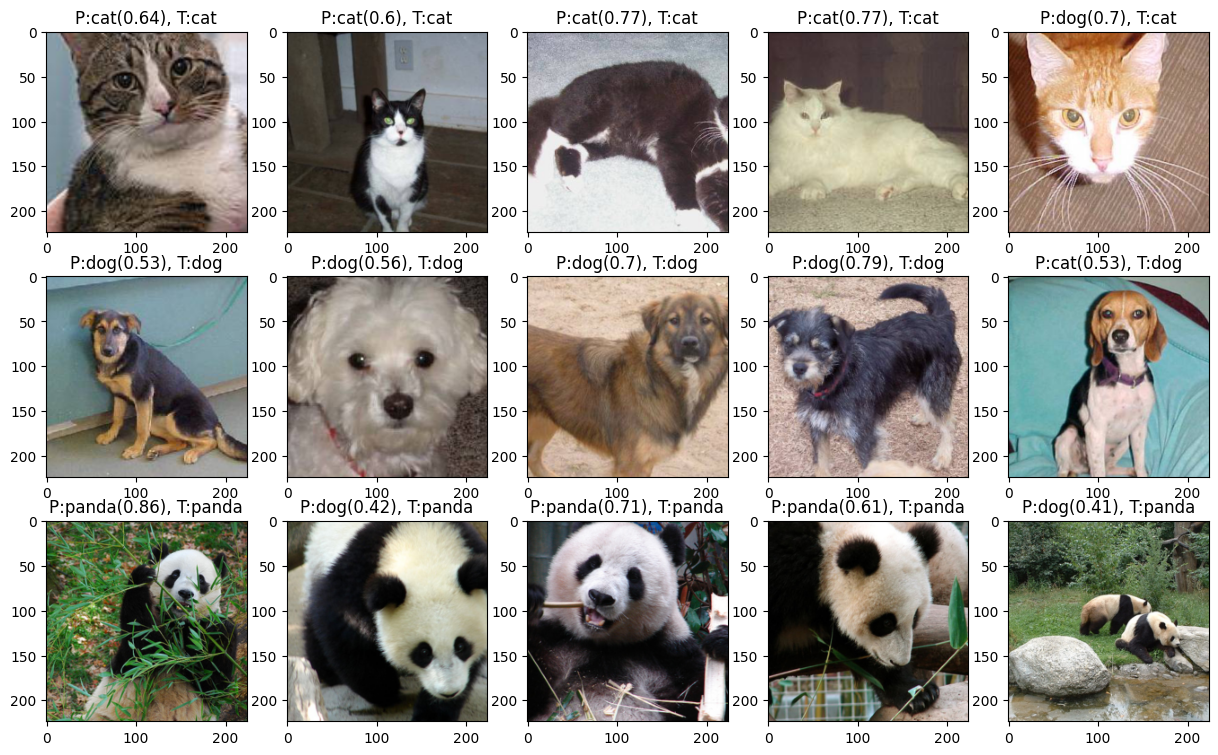

In [118]:
m = MyModel()

m = load_model(m)

train_config = TrainingConfiguration()

test_data_path = os.path.join(train_config.data_root, 'validation')

train_data_path = os.path.join(train_config.data_root, 'training')

mean, std = get_mean_std(train_data_path)


cls, probs, targets = get_sample_prediction(m, test_data_path, mean, std)

You can see that even though the network is trained on a very small subset if data, the predictions are not that bad. This means that our model is ready to be trained.

# <font style="color:red">6. Display Mistakes </font>
In the above code, sample predictions were displayed. But correct predictions are hardly of any use. You should write a similar function which displays only the mistakes made by the network.

**Display only 15 images.**

After you have completed the assignment, <font style="color:red">upload and submit the notebook on the portal</font> so that we can check and provide feedback.

In [112]:
def get_sample_bad_prediction(model, data_root, mean, std):
    batch_size = 600
    
    if torch.cuda.is_available():
        device = "cuda"
        num_workers = 8
    else:
        device = "cpu"
        num_workers = 2
        
        
    # Transformed data
    test_dataset_trans = datasets.ImageFolder(root=data_root, transform=image_common_transforms(mean, std))
    
    # Original image dataset
    test_dataset = datasets.ImageFolder(root=data_root, transform=image_preprocess_transforms())
    
    data_len = test_dataset.__len__()
    
    interval = int(data_len/batch_size)
    
    imgs = []
    inputs = []
    targets = []
    for i in range(batch_size):
        index = i * interval
        trans_input, target = test_dataset_trans.__getitem__(index)
        img, _ = test_dataset.__getitem__(index)
        
        imgs.append(img)
        inputs.append(trans_input)
        targets.append(target)
        
    inputs = torch.stack(inputs)
    
    # Add threshold here and filter out prob < thresh

    cls, prob = prediction(model, device, batch_input=inputs)

    thresh_upper = 0.42
    thresh_lower = 0.37

    bad_prob = []
    bad_cls = []
    index = []

    for i in range(len(prob)):
      if prob[i] < thresh_upper and prob[i] > thresh_lower:
        index.append(i)
        bad_prob.append(prob[i])
        bad_cls.append(cls[i])

    bad_prob = bad_prob[-15:]
    bad_cls = bad_cls[-15:]
    
    plt.style.use('default')
    plt.rcParams["figure.figsize"] = (15, 9)
    fig = plt.figure()
    

        
    for i, cls in enumerate(bad_cls):
        plt.subplot(3, 5, i+1)
        img = transforms.functional.to_pil_image(imgs[i])
        plt.imshow(img)
        plt.gca().set_title('P:{0}({1:.2}), T:{2}'.format(test_dataset.classes[bad_cls[i]],
                                                         bad_prob[i],
                                                         test_dataset.classes[targets[i]]))
        
    fig.savefig('sample_predictions_bad_predictions.png')
    plt.show()
        
    return cls, prob, targets, index

mean: tensor([0.4610, 0.4347, 0.3897]), std: tensor([0.2400, 0.2356, 0.2306])


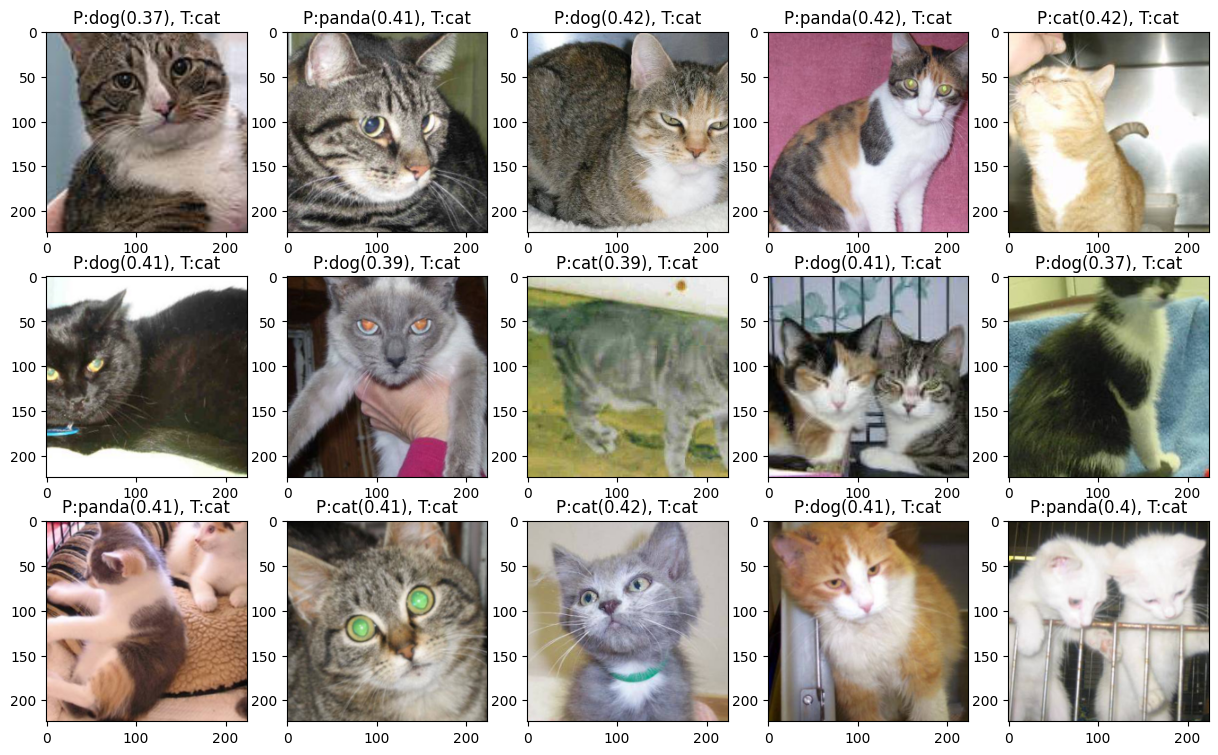

In [113]:
m = MyModel()

m = load_model(m)

train_config = TrainingConfiguration()

test_data_path = os.path.join(train_config.data_root, 'validation')

train_data_path = os.path.join(train_config.data_root, 'training')

mean, std = get_mean_std(train_data_path)


cls, prob, targs, index = get_sample_bad_prediction(m, test_data_path, mean, std)

In [94]:
def get_sample_bad_prediction(model, data_root, mean, std):
    batch_size = 600
    
    if torch.cuda.is_available():
        device = "cuda"
        num_workers = 8
    else:
        device = "cpu"
        num_workers = 2
        
        
    # Transformed data
    test_dataset_trans = datasets.ImageFolder(root=data_root, transform=image_common_transforms(mean, std))
    
    # Original image dataset
    test_dataset = datasets.ImageFolder(root=data_root, transform=image_preprocess_transforms())
    
    data_len = test_dataset.__len__()
    
    interval = int(data_len/batch_size)
    
    imgs = []
    inputs = []
    targets = []
    for i in range(batch_size):
        index = i * interval
        trans_input, target = test_dataset_trans.__getitem__(index)
        img, _ = test_dataset.__getitem__(index)
        
        imgs.append(img)
        inputs.append(trans_input)
        targets.append(target)
        
    inputs = torch.stack(inputs)
    
    # Add threshold here and filter out prob < thresh

    cls, prob = prediction(model, device, batch_input=inputs)

    
    # Create open lists for bad predictions
    
    bad_imgs = []
    bad_cls = []
    bad_prob = []
    bad_targ = []
    index = []

    # Loop through predicted classes and filter out class predictions
    # that do not match the targets
    
    for i in range(len(cls)):
        if cls[i] != targets[i]:
            index.append(i)
            bad_cls.append(cls[i])
            bad_prob.append(prob[i])
            bad_targ.append(targets[i])
            bad_imgs.append(imgs[i])

    # Create 15 random numbers for sample selection
    x = np.random.randint(low=0, high=len(bad_cls)+1, size=(15,))

    # Choose 15 random samples of predicted classes, predicted probabilites,
    # targets, images
    
    bad_probs = [bad_prob[i] for i in x]
    bad_class = [bad_cls[i] for i in x]
    bad_targets = [bad_targ[i] for i in x]
    bad_images = [bad_imgs[i] for i in x]
    
    
    plt.style.use('default')
    plt.rcParams["figure.figsize"] = (15, 9)
    fig = plt.figure()
    
       
    for i, bad_targets in enumerate(bad_targets):
        plt.subplot(3, 5, i+1)
        img = transforms.functional.to_pil_image(bad_images[i])
        plt.imshow(img)
        plt.gca().set_title('P:{0}({1:.2}), T:{2}'.format(test_dataset.classes[bad_class[i]],
                                                          bad_probs[i],
                                                          test_dataset.classes[targets[i]]))
    fig.savefig('sample_predictions_bad_predictions.png')
    plt.show()
        
    return cls, prob, targets, index

mean: tensor([0.4610, 0.4347, 0.3897]), std: tensor([0.2400, 0.2356, 0.2306])


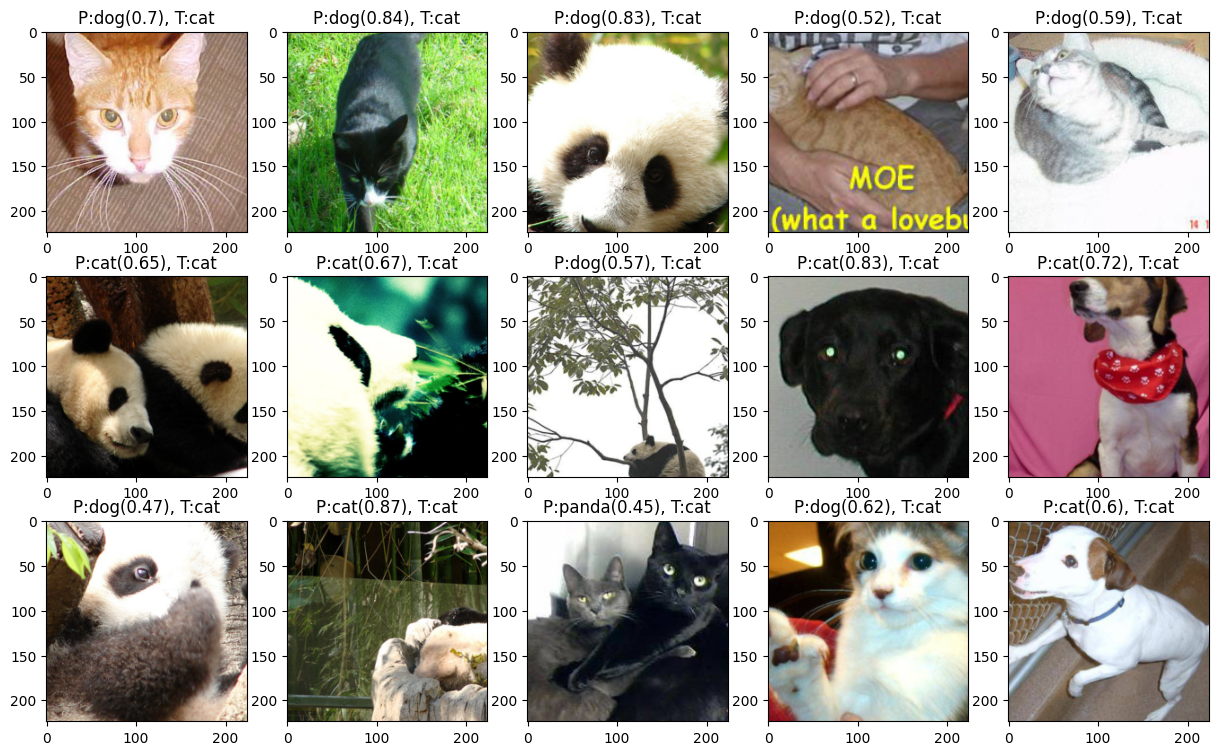

In [95]:
m = MyModel()

m = load_model(m)

train_config = TrainingConfiguration()

test_data_path = os.path.join(train_config.data_root, 'validation')

train_data_path = os.path.join(train_config.data_root, 'training')

mean, std = get_mean_std(train_data_path)


cls, prob, targs, index = get_sample_bad_prediction(m, test_data_path, mean, std)